- Téléchargez l’extrait du jeu de données “fruit recognition”
- Utiliser les méthodes de transfer learning pour créer un modèle permettant de distinguer 3 classes de fruits

In [65]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow import keras

In [26]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/",
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=4
)

Found 20 files belonging to 2 classes.


In [27]:
dataset.class_names

['apple', 'eggplant']

In [28]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [29]:
# normaliser
normalization  = tf.keras.layers.Rescaling(1./255) # specifique aux images

In [30]:
normalized = dataset.map(lambda x,y: (normalization(x),y))

In [31]:
base_model =  tf.keras.applications.MobileNetV2( include_top=False, weights = "imagenet")

/tmp/ipykernel_370828/577005632.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model =  tf.keras.applications.MobileNetV2( include_top=False, weights = "imagenet")


In [60]:
len(dataset.class_names) # nombre de classes

2

In [71]:
# base_model.summary() # seulement des layers convolutionnels
base_model.trainable = False
model  = Sequential([
    layers.InputLayer(shape=(224, 224, 3)),
    layers.Rescaling(1./255), #possibilité de normaliser directement
    base_model,
    layers.GlobalAveragePooling2D(), # passe de la structure en plusieurs du base_model à une structure en 1d des couches suivantes
    layers.Dense(10),
    layers.Dense(len(dataset.class_names)),
    layers.Softmax()
])

In [72]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │        12,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,816 (8.66 MB)

 Trainable params: 12,832 (50.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [73]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [74]:
model.fit(dataset, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.7389 - loss: 0.6186
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 1.0000 - loss: 0.0782
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 1.0000 - loss: 0.0261
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 1.0000 - loss: 0.0078
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 1.0000 - loss: 8.5861e-04
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 1.0000 - loss: 6.2237e-04
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 1.0000 - loss: 5.4120e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
apple


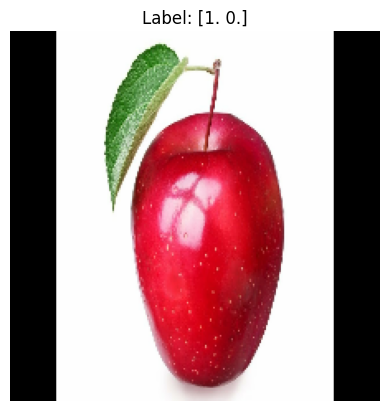

In [89]:
for images, labels in dataset.take(1):
    pred = tf.argmax(model.predict(images),1)
    print(dataset.class_names[pred[0]])
    # Sélectionner la première image du lot
    img = images[0].numpy().astype("uint8")
    label = labels[0].numpy()
 
    # Afficher l'image
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()